<a href="https://colab.research.google.com/github/Lunarr-2/Brew-Bean-Cafe-Sale-Tableau-Dashboard/blob/main/scripts/Brew_%26_Bean_Cafe_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#mounting drive

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Data_Analysis_Tutorial'
# changing directory

/content/drive/MyDrive/Data_Analysis_Tutorial


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing libraries
#

In [4]:
df = pd.read_csv('deep_data_sales.csv')
df.info()
#reading data
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    50 non-null     object 
 1   date              50 non-null     object 
 2   time              50 non-null     object 
 3   cafe_id           50 non-null     int64  
 4   city              50 non-null     object 
 5   product_category  50 non-null     object 
 6   product_name      50 non-null     object 
 7   quantity          50 non-null     int64  
 8   unit_price        50 non-null     float64
 9   total_amount      50 non-null     float64
 10  payment_method    50 non-null     object 
 11  loyalty_member    50 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ KB


,cafe_id,quantity,unit_price,total_amount
count,50.000000,50.000000,50.00000,50.000000
mean,20.380000,1.060000,5.43900,5.644000
std,11.481822,0.239898,2.25353,2.232315
min,5.000000,1.000000,2.50000,2.500000
25%,12.000000,1.000000,3.75000,3.750000
50%,18.000000,1.000000,4.62500,5.000000
75%,29.000000,1.000000,7.68750,7.750000
max,41.000000,2.000000,9.50000,9.500000


## Initial review
- dataset contains 50 rows
- Inconsistent data types

Firstly, I am going to clean the dataset and then fill in missing values if any

## Data Cleaning and Conversion

In [5]:
# convert dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [6]:
# convert numeric columns
numeric_columns = ['cafe_id',	'quantity',	'unit_price',	'total_amount']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
# remove empty/trailing space from categorical column
string_columns =['city', 'product_category', 'product_name', 'payment_method', 'loyalty_member']

for col in string_columns:
  df[col] = df[col].str.strip()

In [8]:
for col in string_columns:
  print(df[col].unique())

['Boston' 'Seattle' 'Austin' 'Denver' 'Atlanta']
['Coffee' 'Bakery' 'Tea' 'Sandwiches' 'Salads']
['Cappuccino' 'Blueberry Muffin' 'Green Tea' 'Turkey Club' 'Caesar Salad'
 'Latte' 'Chocolate Croissant' 'Black Coffee' 'Vegetarian Panini'
 'Chai Latte' 'Chicken Panini' 'Almond Croissant' 'Espresso'
 'Cinnamon Roll' 'Grilled Chicken Salad' 'Herbal Tea' 'Macchiato'
 'Bagel with Cream Cheese' 'BLT' 'Flat White' 'Quinoa Salad' 'Scone'
 'Caramel Latte' 'Italian Sub' 'Iced Tea' 'Chocolate Chip Cookie'
 'Irish Coffee' 'Ham & Cheese' 'Caprese Salad' 'Cold Brew' 'Brownie'
 'Matcha Latte' 'American' 'Tuna Melt' 'Apple Turnover' 'Greek Salad'
 'Mocha' 'Pumpkin Bread' 'Roast Beef' 'Black Tea' 'Lemon Bar'
 'Iced Coffee' 'Spinach Salad' 'Cortado' 'Banana Bread'
 'Chicken Caesar Wrap' 'Hazelnut Latte' 'Peppermint Tea' 'Club Sandwich'
 'Chocolate Eclair']
['Card' 'Cash' 'Mobile App']
['Y' 'N']


In [9]:
df.isna().sum()/ len(df) * 100

,0
transaction_id,0.0
date,0.0
time,0.0
cafe_id,0.0
city,0.0
product_category,0.0
product_name,0.0
quantity,0.0
unit_price,0.0
total_amount,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    50 non-null     object        
 1   date              50 non-null     datetime64[ns]
 2   time              50 non-null     object        
 3   cafe_id           50 non-null     int64         
 4   city              50 non-null     object        
 5   product_category  50 non-null     object        
 6   product_name      50 non-null     object        
 7   quantity          50 non-null     int64         
 8   unit_price        50 non-null     float64       
 9   total_amount      50 non-null     float64       
 10  payment_method    50 non-null     object        
 11  loyalty_member    50 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 4.8+ KB


In [11]:
duplicates_found = df.duplicated().sum()
df_clean = df.drop_duplicates()

## After cleaning and conversion
- dataset now consist of the correct data type
  - numeric data are numeric types
  - categorical data no longer have trailing or ending spaces
  - date has been converted to date datatype as opposed to object
- no null values

Data is now ready for Analysis and visualization

First, make a copy to keep data safe

In [12]:
df_clean_copy = df_clean.copy()
df_clean_copy.head()

,transaction_id,date,time,cafe_id,city,product_category,product_name,quantity,unit_price,total_amount,payment_method,loyalty_member
0,TR_10001,2023-01-15,08:30:00,23,Boston,Coffee,Cappuccino,2,3.75,7.50,Card,Y
1,TR_10002,2023-01-15,09:15:00,12,Seattle,Bakery,Blueberry Muffin,1,3.25,3.25,Cash,N
2,TR_10003,2023-01-15,10:45:00,7,Austin,Tea,Green Tea,1,2.75,2.75,Mobile App,Y
3,TR_10004,2023-01-15,12:30:00,34,Denver,Sandwiches,Turkey Club,1,8.50,8.50,Card,Y
4,TR_10005,2023-01-15,14:15:00,18,Atlanta,Salads,Caesar Salad,1,7.25,7.25,Card,N


In [13]:
# save file for tableau visualization

df_clean_copy.to_csv(
    'cafe_sales_cleaned.csv',
    index=False,
    encoding='utf-8'
)

## Key Metrics
- total revenue
- highest revenue city
- average quantity of coffee
- most popular product

In [21]:
total_revenue = df_clean_copy['total_amount'].sum()
highest_revenue_city = df_clean_copy.groupby('city')['total_amount'].sum().idxmax()
average_quantity_per_transaction = df_clean_copy['quantity'].mean()
most_popular_product = df_clean_copy.groupby('product_name')['quantity'].sum().sort_values(ascending=False).idxmax()


print(f'Total revenue made was: ${total_revenue:.2f}')
print(f'The average quantity of coffee sold was: {average_quantity_per_transaction}')
print(f'The city with the highest revenue was: {highest_revenue_city}')
print(f'The most popular product was: {most_popular_product}')
#

Total revenue made was: $282.20
The average quantity of coffee sold was: 1.06
The city with the highest revenue was: Seattle
The most popular product was: Cappuccino


## Business Questions & Analysis
- top 5 most bought product
- do loyalty members buy more?
-  What payment method generated the most revenue?
- what payment method was used most
- What product category generates the most revenue
- how did product sale look over time ?

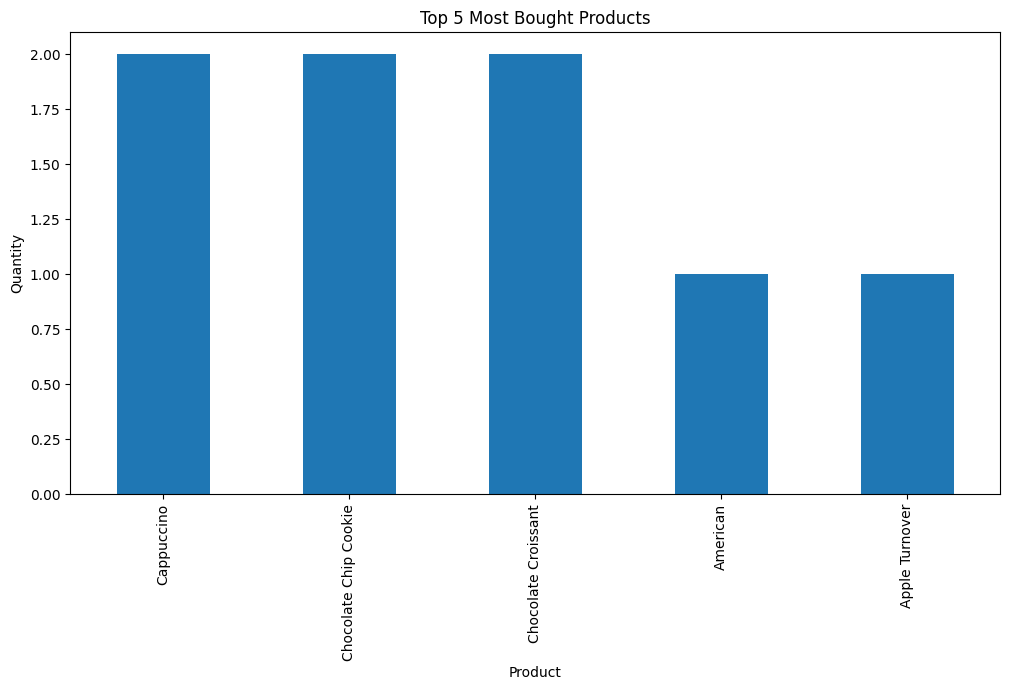

In [15]:
# top 5 most bought product
top_product = df_clean_copy.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(5)

top_product.plot(kind='bar', figsize=(12,6), title='Top 5 Most Bought Products')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()
#

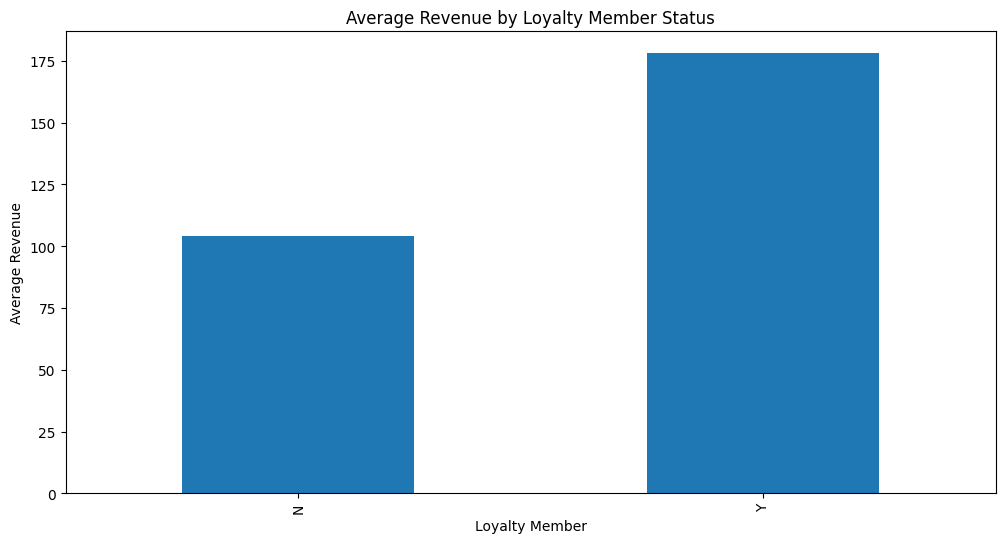

In [16]:
# do loyalty members buy more
loyalty_member_revenue = df_clean_copy.groupby('loyalty_member')['total_amount'].sum()
loyalty_member_revenue.plot(kind='bar', figsize=(12,6), title='Average Revenue by Loyalty Member Status')
plt.xlabel('Loyalty Member')
plt.ylabel('Average Revenue')
plt.show()
#

In [17]:
# What payment method generated the most revenue
payment_method_sales = df_clean_copy.groupby('payment_method')['total_amount'].sum().reset_index()
payment_method_sales

,payment_method,total_amount
0,Card,154.95
1,Cash,64.25
2,Mobile App,63.00


In [18]:
# what payment method was used most
most_used_payment_method = df_clean_copy['payment_method'].value_counts().reset_index()
most_used_payment_method

,payment_method,count
0,Card,27
1,Mobile App,12
2,Cash,11


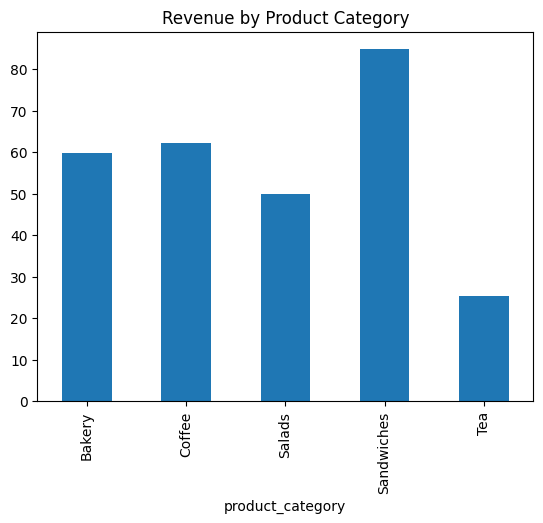

In [19]:
# What product category generates the most revenue
revenue_by_product_category = df_clean_copy.groupby('product_category')['total_amount'].sum()
# revenue_by_product_category.plot(kind='pie', y='total_amount', labels=revenue_by_product_category['product_category'], autopct='%1.1f%%', figsize=(12,6), title='Revenue by Product Category')
revenue_by_product_category.plot(kind='bar', title='Revenue by Product Category' )
plt.show()
#

In [20]:
df_clean_copy['month'] = df_clean_copy['date'].dt.to_period('M')
# df_clean_copy['month']
monthly_revenue = df_clean_copy.groupby('month')['total_amount'].sum().reset_index()
monthly_revenue
# monthly_revenue.plot(marker='o', title='Monthly Revenue')
# plt.xlabel('Month')
# plt.ylabel('Total Revenue')
# plt.show()
#

,month,total_amount
0,2023-01,282.2


# Conclusion

from the above charts and visualization we cand conclude that:

- The total revenue generated was `$282.2`
- Seattle generate the highest revenue with a total of  `$66.00`, Atlanta was a close second with a total revenue of `$65.20`,  while the city with least revenue generated was Boston with a total of `$37.00`
- The most popular products were `Cappuccino`, `Chocolate Chip Cookie` and, `Chocolate Croissant`.
- Loyalty members generate slighty more revenue than the non loyalty members. possibilty for improvment of loyalty membership
- Card was the most used payment method with a total revenue of `$154.95`, while mobile app generated the least with a total revenue of `$63.00`.
- The most used payment method was card, while the least was cash.
- Sandwiches were the category with the most revenue generates with a total of just above `$80`, and the least revenue generated was Tea with total revenue between `$20` - `$30`